In [20]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
from rdkit.Chem import PandasTools

import xlrd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [21]:
df_data = pd.read_excel('tested_molecules-1.xls')

,SMILES,ALDH1_inhibition,ROMol
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,

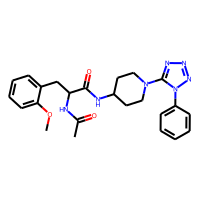
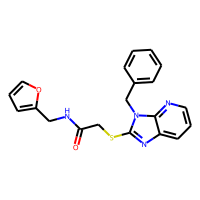
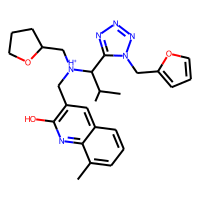
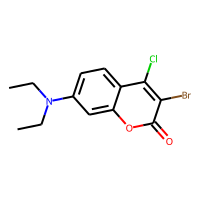
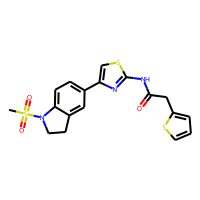

In [22]:
PandasTools.AddMoleculeColumnToFrame(df_data, smilesCol='SMILES')
df_data.head()

,SMILES,ALDH1_inhibition,ROMol,n_Atoms
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,,34
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,,27
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,,35
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,,18
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,,27

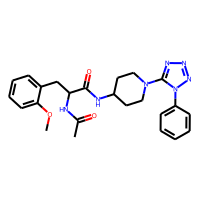
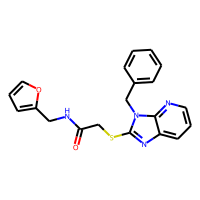
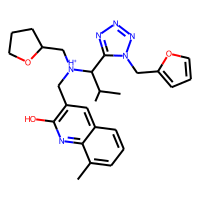
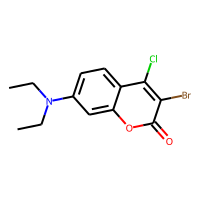
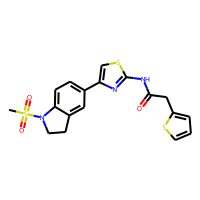

In [95]:
df_data["n_Atoms"] = df_data['ROMol'].map(lambda x: x.GetNumAtoms())
df_data.head()

In [91]:
df_data_inhibitor = df_data[df_data['ALDH1_inhibition']==1]
df_data_noninhibitor = df_data[df_data['ALDH1_inhibition']==0]
df_data_inhibitor['n_Atoms_in'] = df_data_inhibitor['n_Atoms']
df_data_noninhibitor['n_Atoms_non'] = df_data_noninhibitor['n_Atoms']

C:\Users\20212413\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\20212413\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [88]:
combined_df = pd.concat([df_data_inhibitor, df_data_noninhibitor], ignore_index=True) 

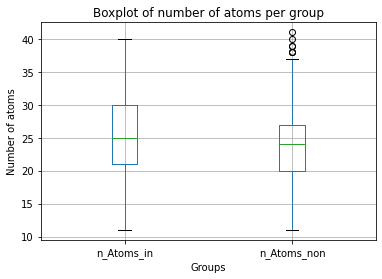

In [96]:
# Plot a boxplot using DataFrame's boxplot method
combined_df[['n_Atoms_in','n_Atoms_non']].boxplot()

plt.xlabel('Groups')
plt.ylabel('Number of atoms')
plt.title('Boxplot of number of atoms per group')

plt.show()